In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
import collections
from collections import Counter
from tqdm import tqdm
# import plotly.express as px
base = Path("/mnt/disks/std750")
data = pd.read_csv(base / "data" / "csvs" / "new4.csv")
main_data = pd.read_csv(base / "data" / "csvs" / "new3.csv")
main_data = main_data[main_data["counts"] >= 5]

In [34]:
iso_code_to_name = {'ab':'Abkhaz',
'ar':'Arabic',
'as':'Assamese',
'br':'Breton',
'cnh':'Hakha Chin',
'ca':'Catalan',
'cs':'Czech',
'cv':'Chuvash',
'cy':'Welsh',
'de':'German',
'dv':'Divehi',
'el':'Greek',
'en':'English',
'es':'Spanish',
'eo':'Esperanto',
'eu':'Basque',
'et':'Estonian',
'fa':'Persian',
'fr':'French',
'fy-NL':'Frisian',
'ga-IE':'Irish',
'ia':'Interlingua',
'id':'Indonesian',
'it':'Italian',
'ja':'Japanese',
'ka':'Georgian',
'ky':'Kyrgyz',
'lv':'Latvian',
'mn':'Mongolian',
'mt':'Maltese',
'nl':'Dutch',
'or':'Oriya',
'pa-IN':'Punjabi',
'pl':'Polish',
'pt':'Portuguese',
'rm-sursilv':'Sursilvan',
'rm-vallader':'Vallader',
'ro':'Romanian',
'ru':'Russian',
'rw':'Kinyarwanda',
'sah':'Sakha',
'sl':'Slovenian',
'sv-SE':'Swedish',
'ta':'Tamil',
'tr':'Turkish',
'tt':'Tatar',
'uk':'Ukrainian',
'vi':'Vietnamese',
'zh-CN':'Chinese'}

In [35]:
data = pd.read_csv(base / "data" / "csvs" / "final_short-v2.csv")
main_data = pd.read_csv(base / "data" / "csvs" / "final-v2.csv")
main_data = main_data[main_data["counts"] >= 5]

In [36]:
main_data.shape

(350789, 4)

In [37]:
languages = main_data['language'].unique()
main_data['wl'] = main_data['word'].str.len()
wordlengths_counts = dict(main_data[['counts','wl']].groupby('wl').sum().reset_index().values.tolist())
language_fractions = {}
for l in tqdm(languages):
	language_fractions[l] = dict(main_data[main_data['language']==l].groupby('wl')['counts'].sum().reset_index().values)

for l in tqdm(language_fractions):
	for j in wordlengths_counts:
		if j not in language_fractions[l]:
			language_fractions[l][j] = 0
language_fractions_df = pd.DataFrame(language_fractions)
language_fractions_df = language_fractions_df.rename(iso_code_to_name, axis=1)

100%|██████████| 53/53 [00:00<00:00, 114882.75it/s]


In [38]:
low = ["mt","br","rm-sursilv","sl","sah","lv","cv","ga-IE","ka","cnh","ha","rm-vallader","vi","as","gn","ab","or"]
medium = ["eu","nl","pt","tt","cs","uk","et","tr","mn","ky","ar","fy-NL","sv-SE","id","el","ro","ia","sk","zh-CN","dv"]
high = ["de","en","fr","ca","rw",'es',"ru","it","pl","fa","eo","cy","ta"]

In [39]:
iso_code_to_name['gn'] = "Gaurian"
iso_code_to_name['ha'] = "Hausa"
iso_code_to_name['sk'] = "Slovak"
high_lang = [iso_code_to_name[i] for i in high]
low_lang = [iso_code_to_name[i] for i in low]
main_data_lang = main_data.replace({'language':iso_code_to_name})

In [40]:
medium_lang = [iso_code_to_name[i] for i in medium]

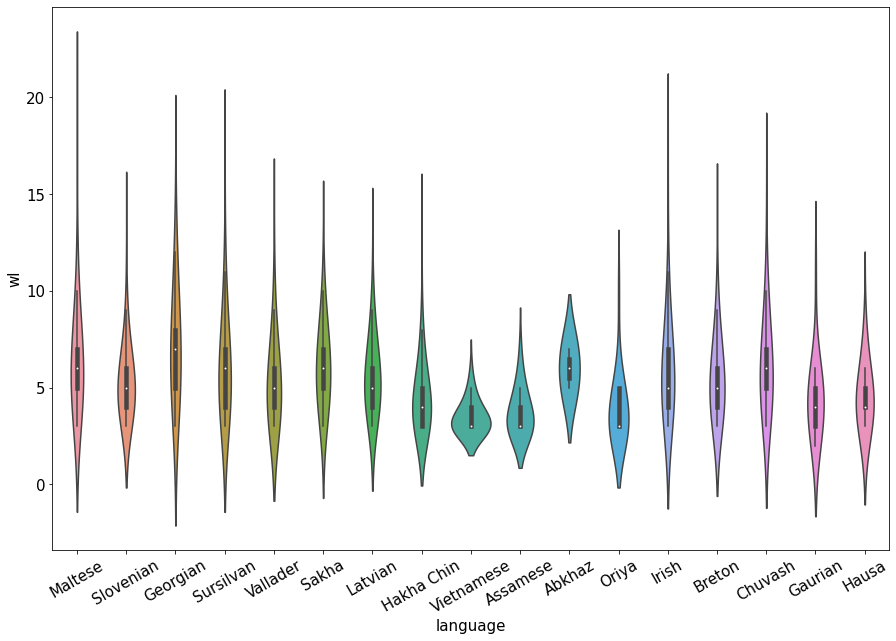

In [41]:
## Unique keywords

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(low_lang),:],bw=1, ax=ax)
ax.tick_params(axis='x', rotation=30)

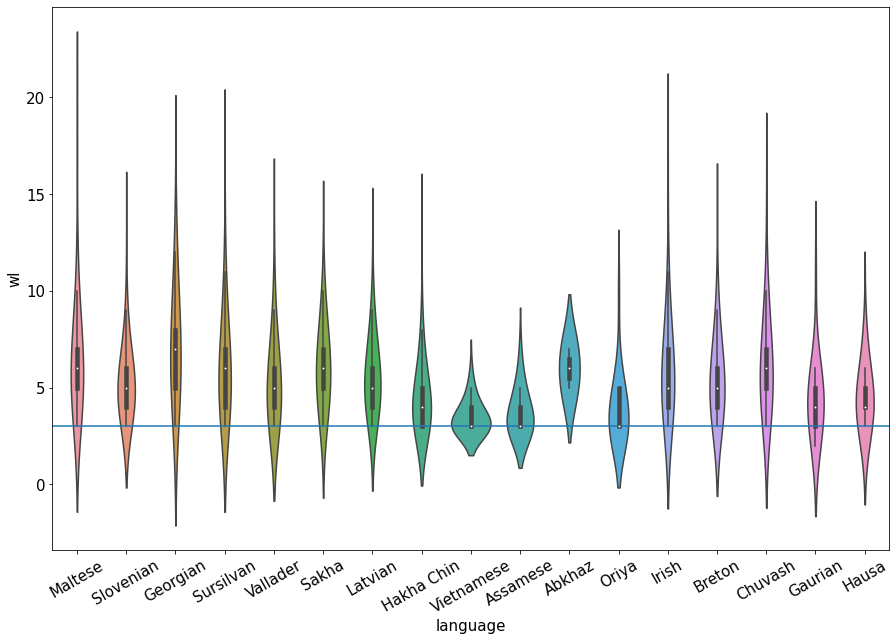

In [42]:
## Unique keywords

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3)
ax.tick_params(axis='x', rotation=30)

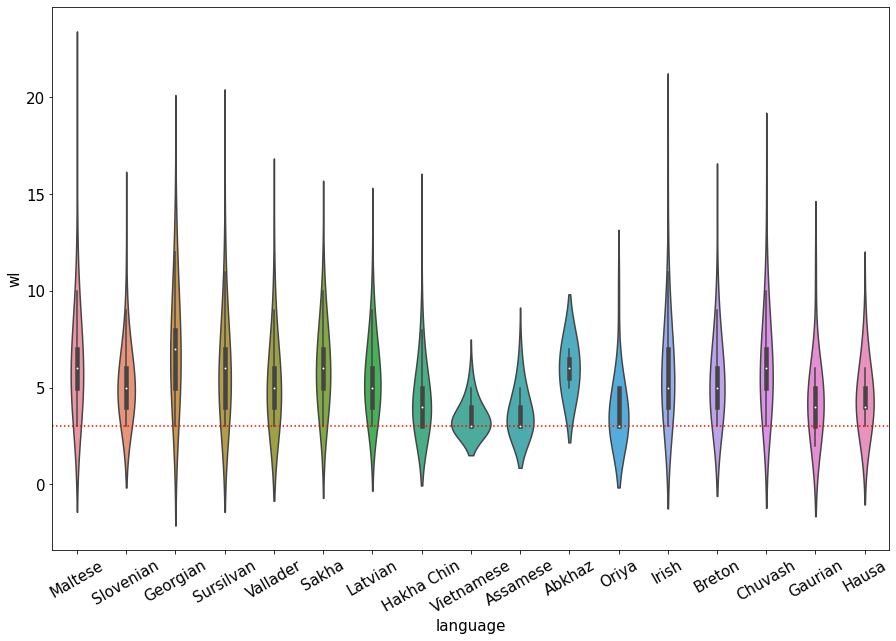

In [43]:
## Unique keywords

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls=':')
ax.tick_params(axis='x', rotation=30)

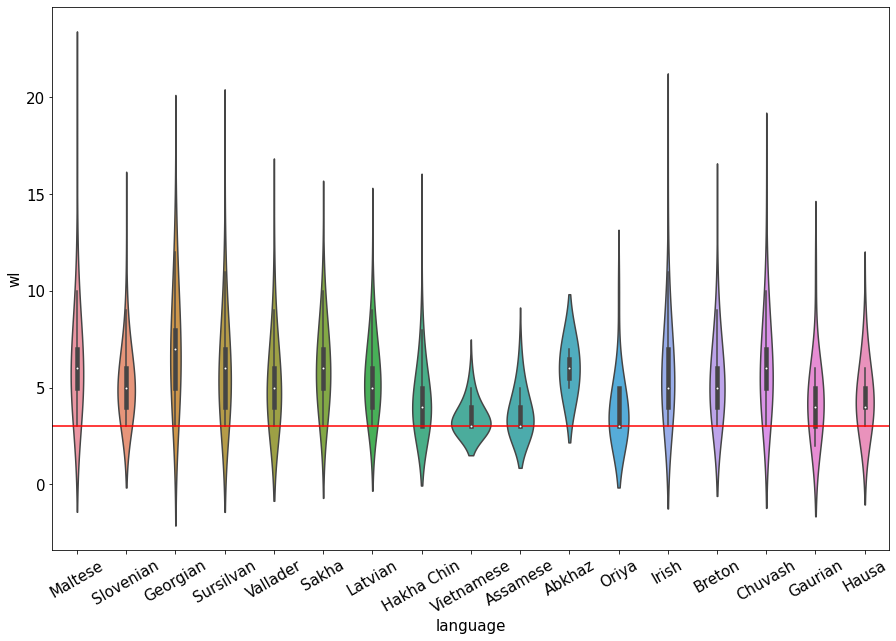

In [44]:
## Unique keywords

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='-')
ax.tick_params(axis='x', rotation=30)

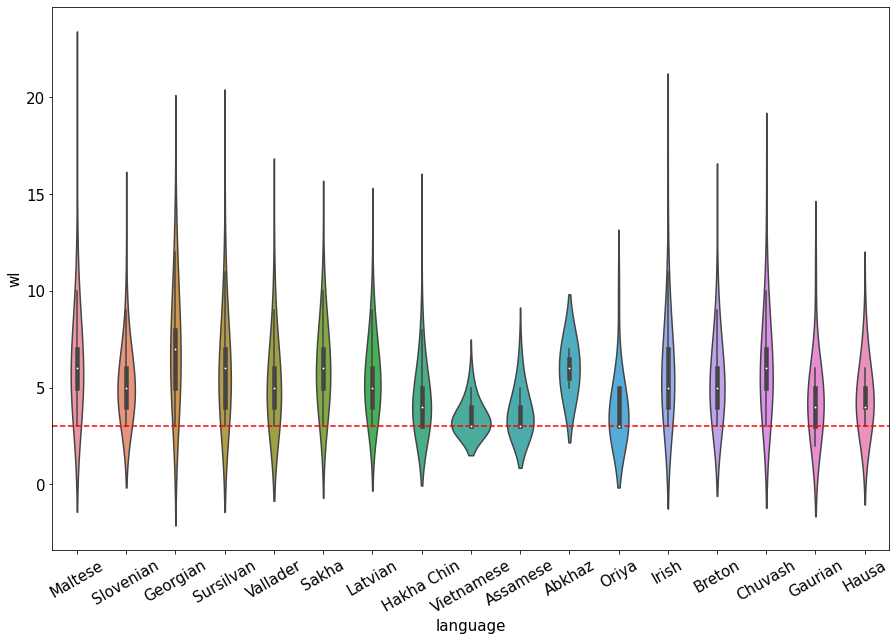

In [45]:
## Unique keywords

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="language",y="wl",data=main_data_lang.loc[main_data_lang['language'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='--')
ax.tick_params(axis='x', rotation=30)

In [46]:
languages = main_data_lang['language'].unique()
from tqdm import tqdm
data = []
for l in tqdm(languages):
	tdf = main_data_lang[main_data_lang['language']==l]
	tdd = dict(tdf[['counts','wl']].groupby('wl').sum().reset_index().values.astype(int))
	for w in tdd:
		data.extend([[l, w] for i in range(tdd[w])])

100%|██████████| 53/53 [00:12<00:00,  4.14it/s]


In [47]:
len(data)

23965839

In [48]:
data[0]

['Italian', 3]

In [49]:
data = pd.DataFrame(data, columns=['Languages','Word Lengths'])

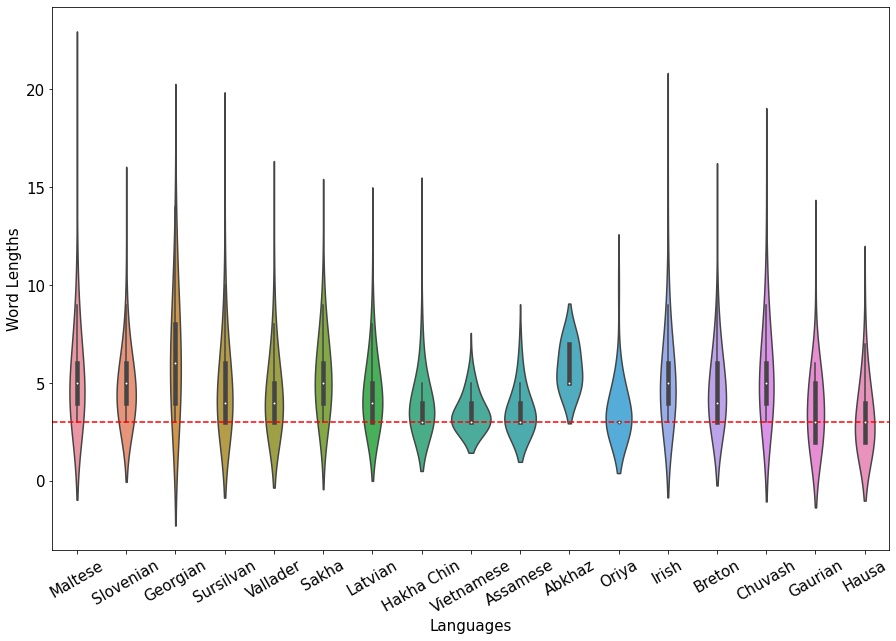

In [50]:
# Extractions

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="Languages",y="Word Lengths",data=data.loc[data['Languages'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='--')
ax.tick_params(axis='x', rotation=30)

In [51]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

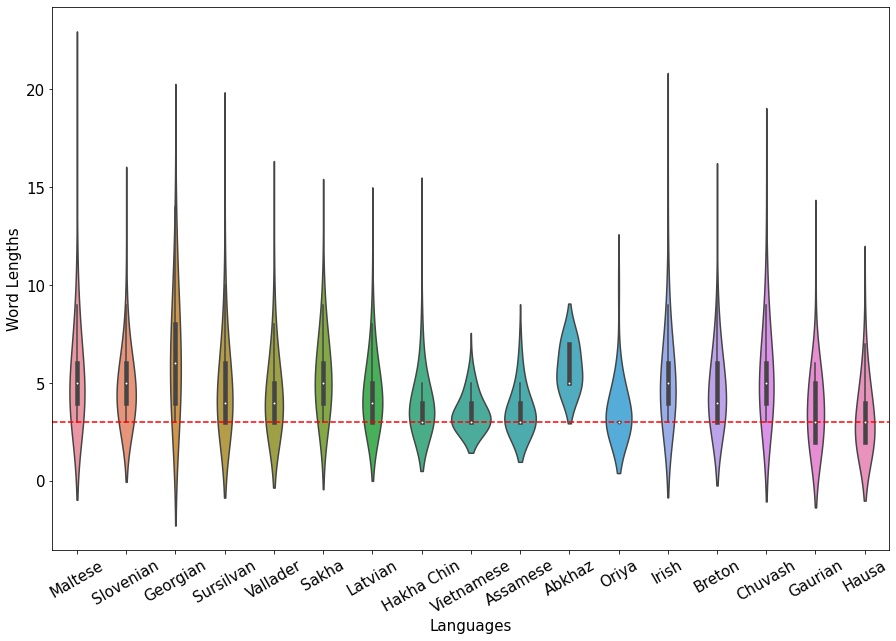

In [52]:
# Extractions

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="Languages",y="Word Lengths",data=data.loc[data['Languages'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='--')
ax.tick_params(axis='x', rotation=30)

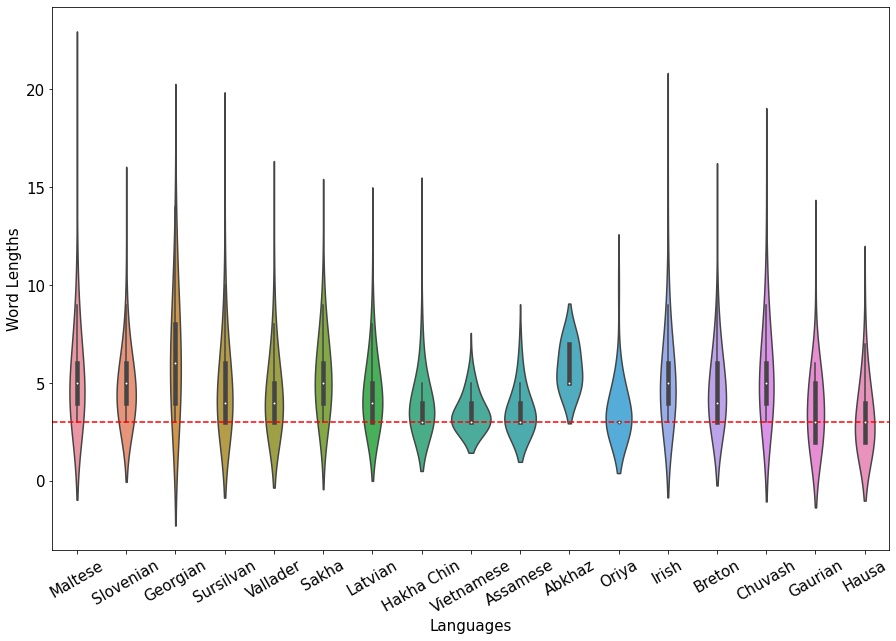

In [53]:
# Extractions


fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="Languages",y="Word Lengths",data=data.loc[data['Languages'].isin(low_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='--')
ax.tick_params(axis='x', rotation=30)

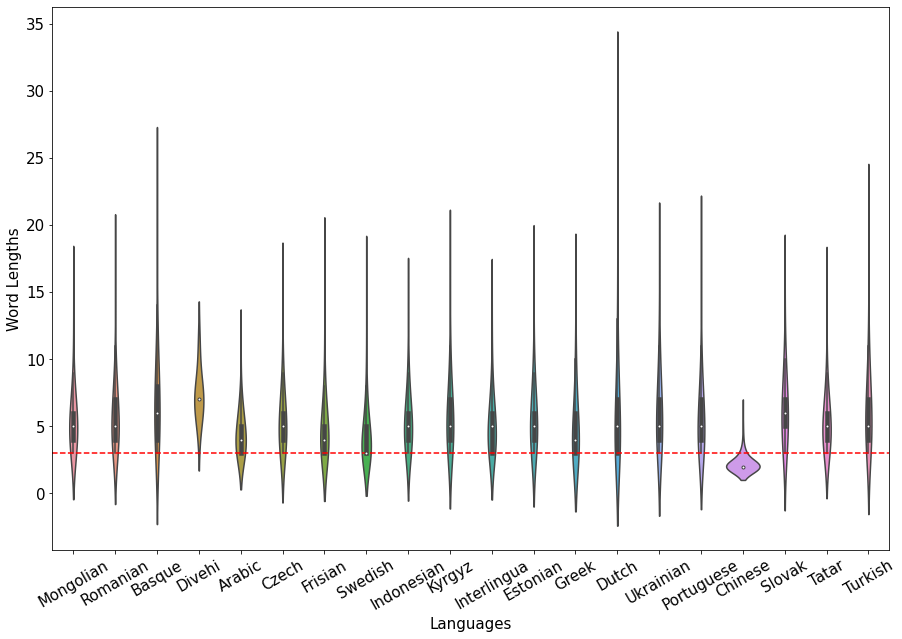

In [54]:
# Extractions

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="Languages",y="Word Lengths",data=data.loc[data['Languages'].isin(medium_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='--')
ax.tick_params(axis='x', rotation=30)

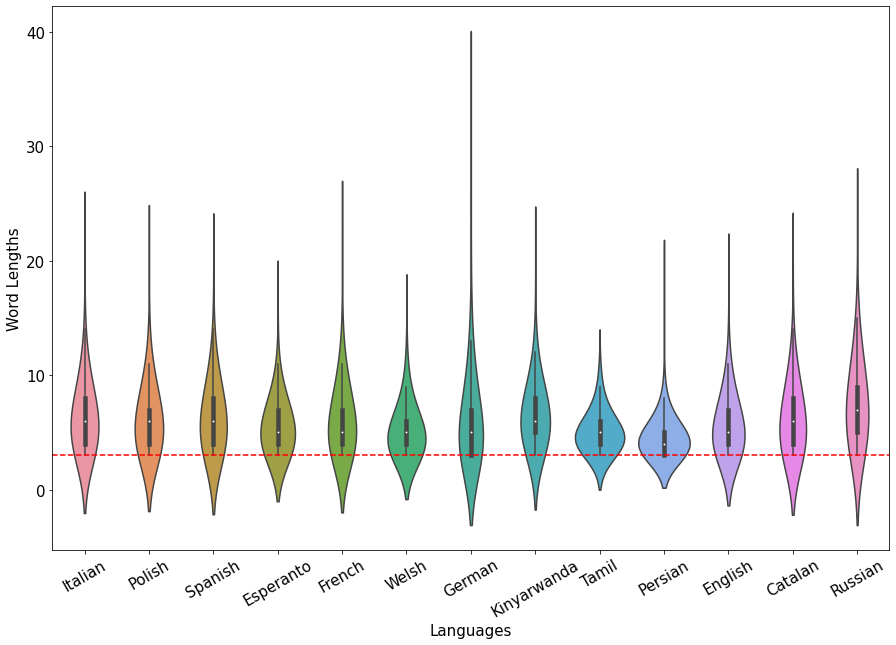

In [55]:
# Extractions

fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="Languages",y="Word Lengths",data=data.loc[data['Languages'].isin(high_lang),:],bw=1, ax=ax)
ax.axhline(3, c='red',ls='--')
ax.tick_params(axis='x', rotation=30)